# Homework 5 - Kaveh
Climate Modeling, ATS 421/521, Spring 2018

## Draft due Tues, May 22 (noon); Final due Thurs, May 24 (noon)

OPTIONAL: With a partner, work together to analyze the same two models.  Your plots can be the same, and you can (should) discuss them with each other, but your discussion (Questions 6 and 7b) should be in your own words.  Please indicate at the top of your notebook that you have worked with a partner on this assignment (and who that partner is).

See the "Downloading_CMIP5_Data" PDF for instructions on obtaining the data.

Also, the "copying_files_to_jupyter_server" document includes instructions for how to upload large files from your own computer to the server (when drag-and-drop doesn't work).


## 1. Calculate and plot latitude-longitude maps of annual average near surface air temperature, evaporation, and precipitation over the last 100 years of the simulation for each model, and then difference plots (between the two models) for all three variables. 

(You may need to re-grid the data to compare the two models. 9 plots total)

In [1]:
% matplotlib inline

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interpn
import xarray as xr

plt.rcParams['figure.figsize'] = [10, 5]

EARTH_RADIUS = 6371 * 1000        # Earth radius in meters

"""
Model 1: CESM1
Model 2: NorESM1
"""

CESM1_PATHS = {
    'tas': '/data/karimiak/CESM1/tas_Amon_CESM1-WACCM_piControl_r1i1p1_009601-029512.nc',
    'pr': '/data/karimiak/CESM1/pr_Amon_CESM1-WACCM_piControl_r1i1p1_009601-029512.nc',
    'evspsbl': '/data/karimiak/CESM1/evspsbl_Amon_CESM1-WACCM_piControl_r1i1p1_009601-029512.nc'
}

NorESM1_PATHS = {
    'tas': '/data/karimiak/NorESM1/tas_Amon_NorESM1-ME_piControl_r1i1p1_090101-115212.nc',
    'pr': '/data/karimiak/NorESM1/pr_Amon_NorESM1-ME_piControl_r1i1p1_090101-115212.nc',
    'evspsbl': '/data/karimiak/NorESM1/evspsbl_Amon_NorESM1-ME_piControl_r1i1p1_090101-115212.nc'
}

<font color='blue'>The following syntax over on all datasets average the selected value over the last 100 years of available data:</font>

> `<model_name>.<variable>[-1200:,:,:].mean(axis=0)`

<font color='blue'>Axis zero is time in all datasets.</font>

/usr/local/lib/python3.5/dist-packages/xarray/conventions.py:377: RuntimeWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)


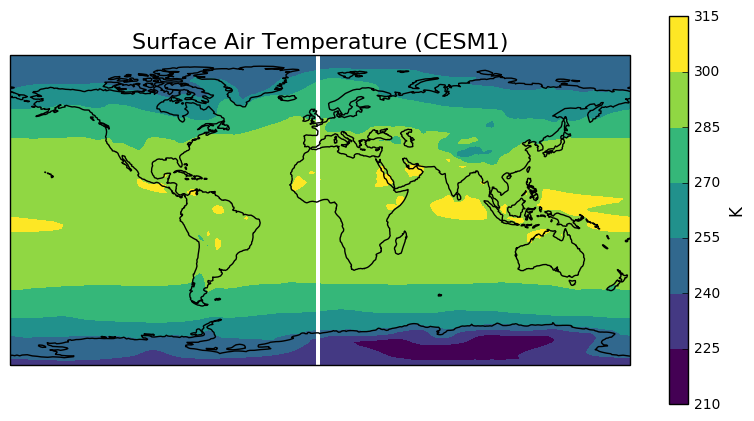

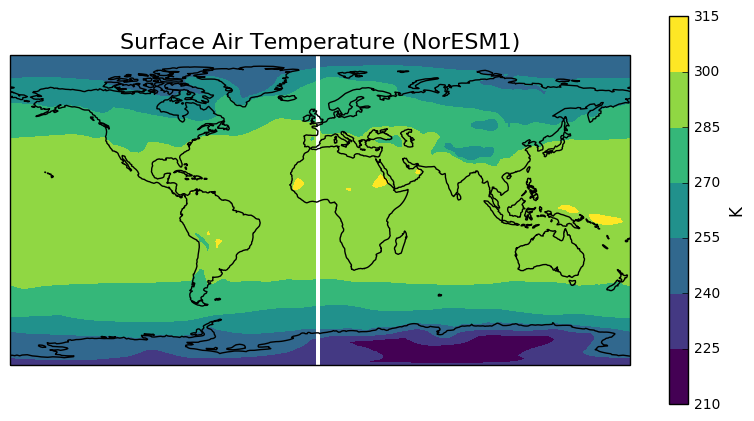

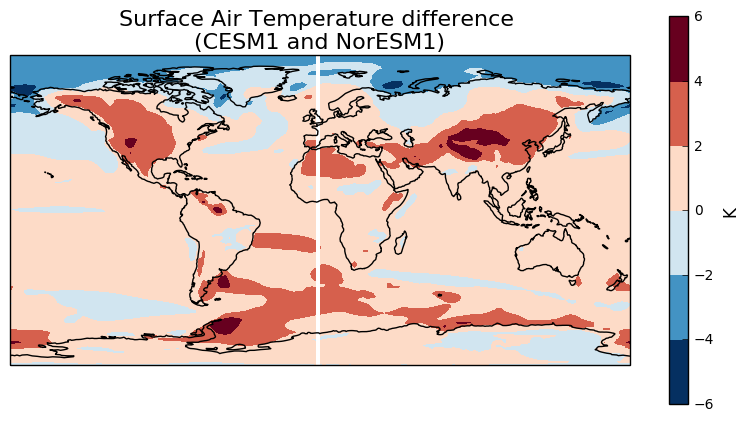

In [2]:
CESM1_tas = xr.open_dataset(CESM1_PATHS['tas'])
NorESM1_tas = xr.open_dataset(NorESM1_PATHS['tas'])

# Even though these datasets have the latitudes, their difference does not match exactly
# due to a small difference at their higher decimal points. As a hack, coordination of NorESM1 is replaced by
# coordinations of CESM1
NorESM1_tas.coords['lat'] = CESM1_tas.coords['lat']
NorESM1_tas.coords['lon'] = CESM1_tas.coords['lon']

# Plot surface air temperature, Model 1.
CESM1_tas_mean = CESM1_tas.tas[-1200:,:,:].mean(dim='time')
ax = plt.axes(projection=ccrs.PlateCarree())
contour = CESM1_tas_mean.plot.contourf(ax=ax, transform=ccrs.PlateCarree())
plt.title('Surface Air Temperature (CESM1)', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
contour.colorbar.ax.set_ylabel('K', fontsize=12)
ax.coastlines()
plt.show()

# Plot surface air temperature, Model 2.
NorESM1_tas_mean = NorESM1_tas.tas[-1200:,:,:].mean(dim='time')
ax = plt.axes(projection=ccrs.PlateCarree())
contour = NorESM1_tas_mean.plot.contourf(ax=ax, transform=ccrs.PlateCarree())
plt.title('Surface Air Temperature (NorESM1)', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
contour.colorbar.ax.set_ylabel('K', fontsize=12)
ax.coastlines()
plt.show()

# Plot surface air temperature difference.
tas_diff = CESM1_tas_mean - NorESM1_tas_mean
ax = plt.axes(projection=ccrs.PlateCarree())
contour = tas_diff.plot.contourf(ax=ax, transform=ccrs.PlateCarree())
plt.title('Surface Air Temperature difference \n(CESM1 and NorESM1)', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
contour.colorbar.ax.set_ylabel('K', fontsize=12)
ax.coastlines()
plt.show()

/usr/local/lib/python3.5/dist-packages/xarray/conventions.py:377: RuntimeWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)


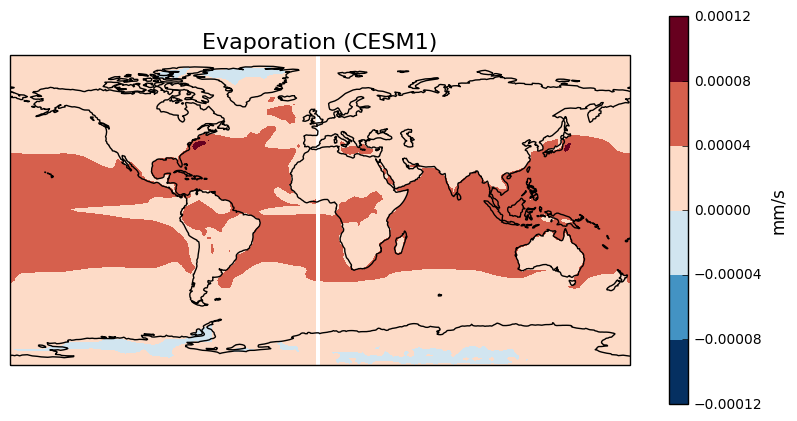

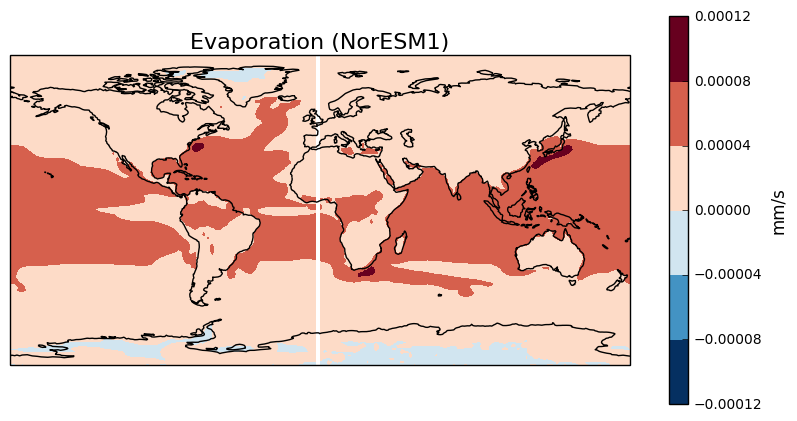

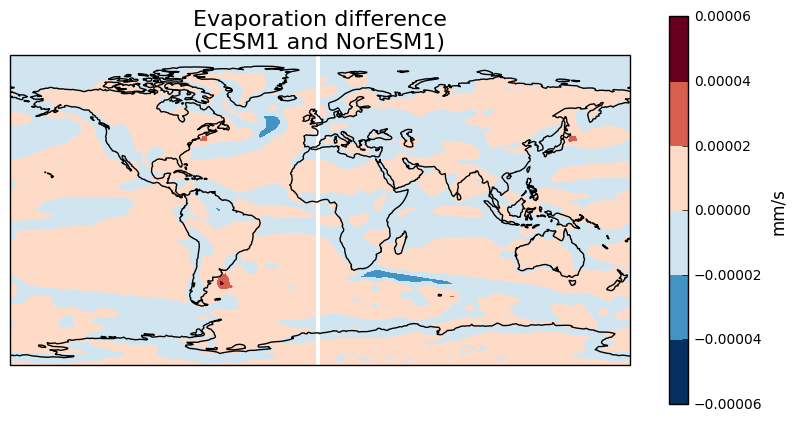

In [3]:
CESM1_evap = xr.open_dataset(CESM1_PATHS['evspsbl'])
NorESM1_evap = xr.open_dataset(NorESM1_PATHS['evspsbl'])

# See the first section on adjusting coordinates
NorESM1_evap.coords['lat'] = CESM1_evap.coords['lat']
NorESM1_evap.coords['lon'] = CESM1_evap.coords['lon']

# Plot evap, Model 1.
CESM1_evap_mean = CESM1_evap.evspsbl[-1200:,:,:].mean(axis=0)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
contour = CESM1_evap_mean.plot.contourf(ax=ax, transform=ccrs.PlateCarree())
plt.title('Evaporation (CESM1)', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
contour.colorbar.ax.set_ylabel('mm/s', fontsize=12)
ax.coastlines()
plt.show()

# Plot evap, Model 2.
NorESM1_evap_mean = NorESM1_evap.evspsbl[-1200:,:,:].mean(axis=0)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
contour = NorESM1_evap_mean.plot.contourf(ax=ax, transform=ccrs.PlateCarree())
plt.title('Evaporation (NorESM1)', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
contour.colorbar.ax.set_ylabel('mm/s', fontsize=12)
ax.coastlines()
plt.show()

# Plot evap difference.
evap_diff = CESM1_evap_mean - NorESM1_evap_mean
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
contour = evap_diff.plot.contourf(ax=ax, transform=ccrs.PlateCarree())
plt.title('Evaporation difference\n(CESM1 and NorESM1)', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
contour.colorbar.ax.set_ylabel('mm/s', fontsize=12)
ax.coastlines()
plt.show()

/usr/local/lib/python3.5/dist-packages/xarray/conventions.py:377: RuntimeWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)


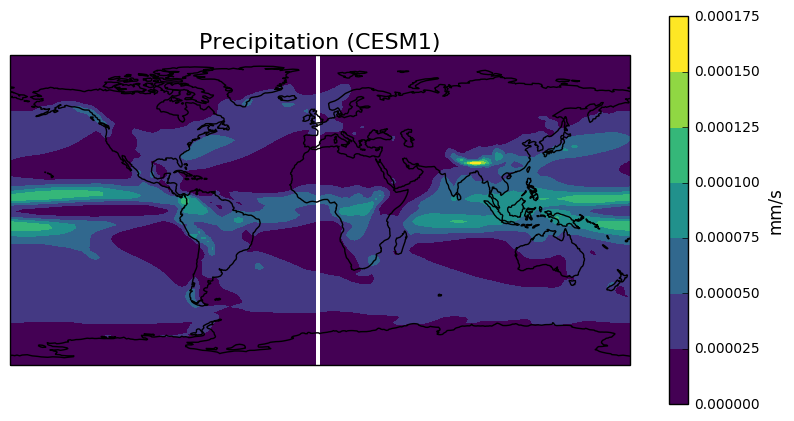

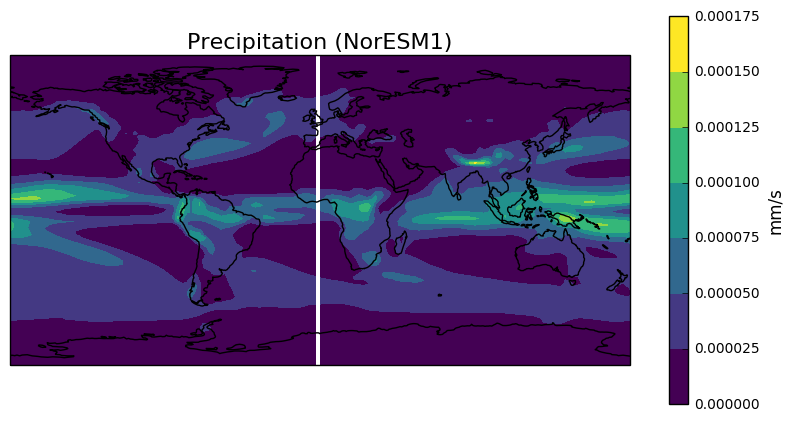

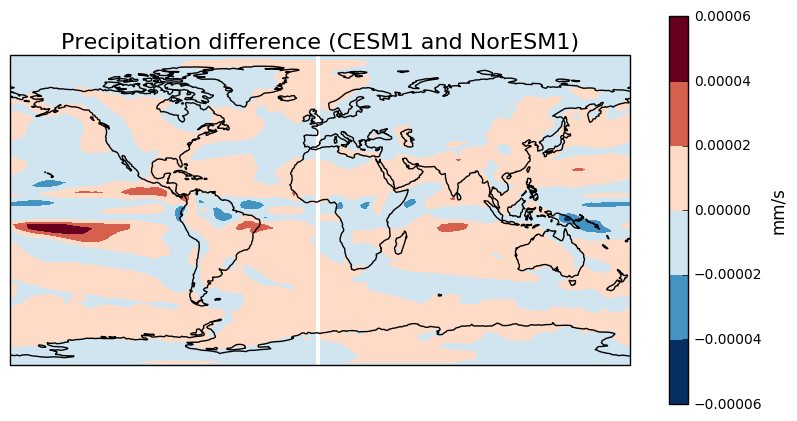

In [4]:
CESM1_pr = xr.open_dataset(CESM1_PATHS['pr'])
NorESM1_pr = xr.open_dataset(NorESM1_PATHS['pr'])

# See the first section on adjusting coordinates
NorESM1_pr.coords['lat'] = CESM1_pr.coords['lat']
NorESM1_pr.coords['lon'] = CESM1_pr.coords['lon']

# Plot precip, Model 1.
CESM1_pr_mean = CESM1_pr.pr[-1200:,:,:].mean(axis=0)
ax = plt.axes(projection=ccrs.PlateCarree())
contour = CESM1_pr_mean.plot.contourf(ax=ax, transform=ccrs.PlateCarree())
plt.title('Precipitation (CESM1)', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
contour.colorbar.ax.set_ylabel('mm/s', fontsize=12)
ax.coastlines()
plt.show()

# Plot precip, Model 2.
NorESM1_pr_mean = NorESM1_pr.pr[-1200:,:,:].mean(axis=0)
ax = plt.axes(projection=ccrs.PlateCarree())
contour = NorESM1_pr_mean.plot.contourf(ax=ax, transform=ccrs.PlateCarree())
plt.title('Precipitation (NorESM1)', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
contour.colorbar.ax.set_ylabel('mm/s', fontsize=12)
ax.coastlines()
plt.show()

# Plot precip difference.
pr_diff = CESM1_pr_mean - NorESM1_pr_mean
ax = plt.axes(projection=ccrs.PlateCarree())
contour = pr_diff.plot.contourf(ax=ax, transform=ccrs.PlateCarree())
plt.title('Precipitation difference (CESM1 and NorESM1)', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
contour.colorbar.ax.set_ylabel('mm/s', fontsize=12)
ax.coastlines()
plt.show()

## 2. Plot zonally averaged values for the three variables. 

(Plot both models on the same plot, one for each variable, 3 plots total.)

<font color='blue'>Zonally average is calculated using mean values over time calculated in previous section using the following syntax:</font>
> `<MODEL>_<variable>_mean.mean('lon')`

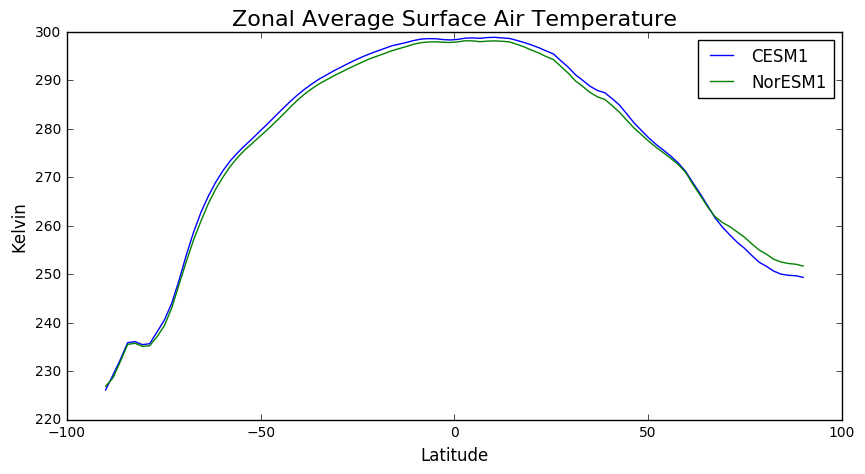

In [5]:
# Plot zonal average surface air temperature
temp_zonal_1 = CESM1_tas_mean.mean('lon')
temp_zonal_1.plot(label='CESM1')
temp_zonal_2 = NorESM1_tas_mean.mean('lon')
temp_zonal_2.plot(label='NorESM1')

plt.title('Zonal Average Surface Air Temperature', fontsize=16)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Kelvin', fontsize=12)
plt.legend()
plt.show()

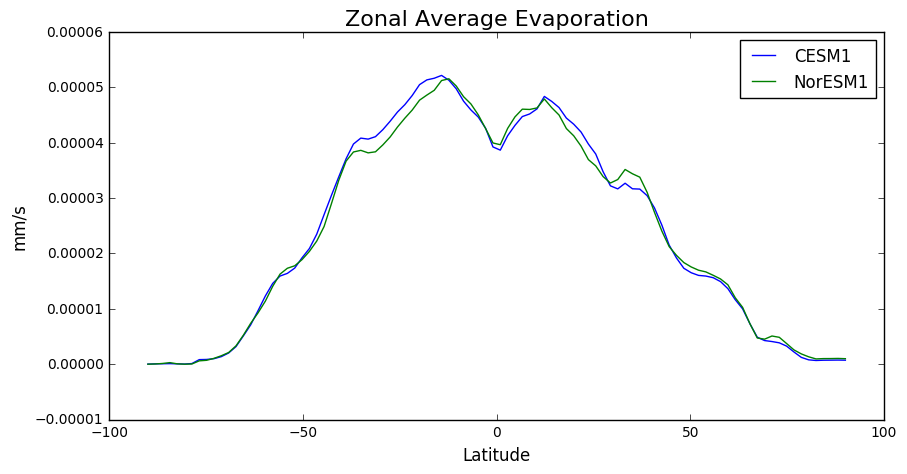

In [6]:
# Plot zonal average evap
evap_zonal_1 = CESM1_evap_mean.mean('lon')
evap_zonal_1.plot(label='CESM1')
evap_zonal_2 = NorESM1_evap_mean.mean('lon')
evap_zonal_2.plot(label='NorESM1')

plt.title('Zonal Average Evaporation', fontsize=16)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('mm/s', fontsize=12)
plt.legend()
plt.show()

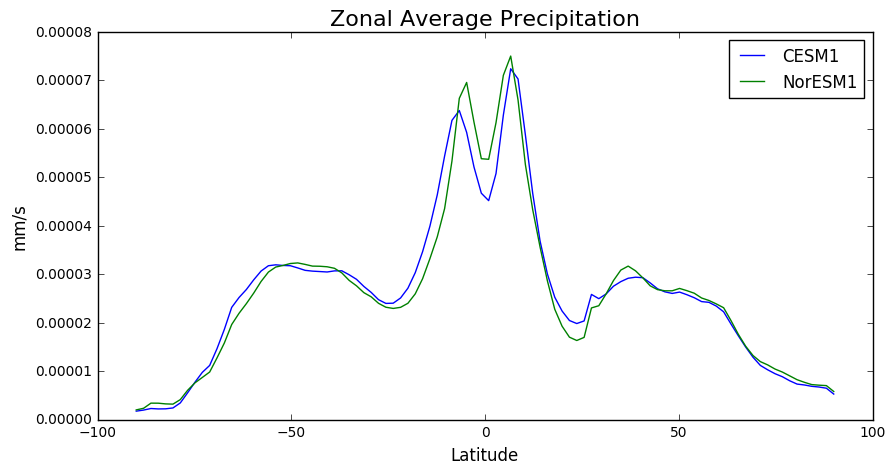

In [7]:
# Plot zonal average precip
precip_zonal_1= CESM1_pr_mean.mean('lon')
precip_zonal_1.plot(label='CESM1')
precip_zonal_2 = NorESM1_pr_mean.mean('lon')
precip_zonal_2.plot(label='NorESM1')

plt.title('Zonal Average Precipitation', fontsize=16)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('mm/s', fontsize=12)
plt.legend()
plt.show()

We will be comparing the zonal averages for the different models as a class (similar to the 1-D model comparison).  Since each model is different, we will likely see some interesting behavior.  To make comparison easier, please save your zonal averages to the following variables:

Model 1:
temp_zonal_1, 
precip_zonal_1, 
evap_zonal_1, 
lat1

Model 2:
temp_zonal_2, 
precip_zonal_2, 
evap_zonal_2, 
lat2

If you are working with a partner, only one of you needs to do this.

In [8]:
# NOTE: Other variables are assinged in previous section
# Latitude is the same for all datasets, so the latitude array from surface temperature is saved for all of them.
lat1 = CESM1_tas.lat
lat2 = NorESM1_tas.lat

## 3. Calculate the global averages (and differences between models) for all three variables.

<font color="blue">Surface area of latitude bands is used for normalizing global average of each dataset. Global average is calculated by averaging values of adjacent cells using the syntax below:</font>
> `(var_list[:-1] + var_list[1:]) / 2`

In [9]:
CESM1_bands_surface_areas = 2 * np.pi * (EARTH_RADIUS ** 2) * np.diff(np.sin(np.radians(lat1)))
NorESM1_bands_surface_areas = 2 * np.pi * (EARTH_RADIUS ** 2) * np.diff(np.sin(np.radians(lat2)))

In [10]:
# Calculate global average surface air temperature for both models. Calculate the difference.
CESM1_global_avg_tas = np.average((temp_zonal_1.values[:-1] + temp_zonal_1[1:]) / 2, weights=CESM1_bands_surface_areas)
NorESM1_global_avg_tas = np.average((temp_zonal_2.values[:-1] + temp_zonal_2[1:]) / 2, weights=NorESM1_bands_surface_areas)
print('CESM1 Global Average Surface Air Temperature: {:0.2f} K\n'.format(CESM1_global_avg_tas))
print('NorESM1 Global Average Surface Air Temperature: {:0.2f} K\n'.format(NorESM1_global_avg_tas))
print('Global Average Surface Air Temperature Difference: {:0.2f} K\n'.format(CESM1_global_avg_tas - NorESM1_global_avg_tas))

CESM1 Global Average Surface Air Temperature: 286.75 K

NorESM1 Global Average Surface Air Temperature: 285.92 K

Global Average Surface Air Temperature Difference: 0.83 K



In [11]:
# Calculate global average evap ...
CESM1_global_avg_evap = np.average((evap_zonal_1.values[:-1] + evap_zonal_1[1:]) / 2, weights=CESM1_bands_surface_areas)
NorESM1_global_avg_evap = np.average((evap_zonal_2.values[:-1] + evap_zonal_2[1:]) / 2, weights=NorESM1_bands_surface_areas)
print('CESM1 Global Average Evaporation: {} mm/s\n'.format(CESM1_global_avg_evap))
print('NorESM1 Global Average Evaporation: {} mm/s\n'.format(NorESM1_global_avg_evap))
print('Global Average Evaporation Difference: {} mm/s\n'.format(CESM1_global_avg_evap - NorESM1_global_avg_evap))

CESM1 Global Average Evaporation: 3.2709255085755864e-05 mm/s

NorESM1 Global Average Evaporation: 3.229846503135808e-05 mm/s

Global Average Evaporation Difference: 4.1079005439778284e-07 mm/s



In [12]:
# Calculate global average precip ...
CESM1_global_avg_pr = np.average((precip_zonal_1.values[:-1] + precip_zonal_1[1:]) / 2, weights=CESM1_bands_surface_areas)
NorESM1_global_avg_pr = np.average((precip_zonal_2.values[:-1] + precip_zonal_2[1:]) / 2, weights=NorESM1_bands_surface_areas)
print('CESM1 Global Average Precipitation: {} mm/s\n'.format(CESM1_global_avg_pr))
print('NorESM1 Global Average Precipitation: {} mm/s\n'.format(NorESM1_global_avg_pr))
print('Global Average Precipitation Difference: {} mm/s\n'.format(CESM1_global_avg_pr - NorESM1_global_avg_pr))

CESM1 Global Average Precipitation: 3.270921160421302e-05 mm/s

NorESM1 Global Average Precipitation: 3.229879808949664e-05 mm/s

Global Average Precipitation Difference: 4.104135147163832e-07 mm/s



## 4. Calculate the moisture flux differences (E-P) and plot latitude-longitude maps for each model as well as a figure showing both zonal averages.  [Extra credit]

(3 plots total) 

In [13]:
# Calculate E-P for both models

# Lat-lon plot, Model 1

# Lat-lon plot, Model 2

# Plot of zonal average E-P for both models

## 5. Calculate and plot the zonal-average meridional water fluxes in the atmosphere by integrating E-P from the South Pole northward. [Extra credit]

(Hint: this is similar to the meridional heat flux calculation. You can put fluxes from both models on the same plot.) 

In [14]:
# Calculate water flux as a function of latitude for both models

# Plot the flux as a function of latitude for both models

## 6. Compare and contrast the two models, using the plots from _all_ of the above questions. 

Your discussion should be a few paragraphs long.  Where possible, relate what you observe to climate science concepts (e.g., Hadley circulation, subtropics).

## Surface Air temperature:

    Generally CESM1 shows higher surface air temperature except at the north pole, which its temperature is lower than NorESM1. The biggest temperature differences are in central Asia and south of South America, close to Antarctica, where CEMS1 is at least 4 degree warmer. Looking at individual maps of models, it can be seen generally ocean temperature is higher in CESM1. As for global average, CESM1 is 0.83 degree warmer.

## Evaporation:

    Both models have almost similar distribution pattern for evaporation. As for difference, CESM1 has higher evaporation rate at south east of South America and it has lower rate in northern part of the Atlantic Ocean and also south east of Africa. Based on the plot, CESM1 shows more evaporation in southern hemisphere and between ~5-30 degree latitude, and at other latitude bands, NorESM1 shows more evaporation. Globally NorESM1 has a higher evaporation rate, i.e. ~4.1e-07 mm/s.

## Precipitation:

    Distribution of precipitation is almost similar over the continents, while there are discrepancies over the oceans. Around the equator and at different longitudes, precipitation rate oscillate between the two models. As we go west from South America, NorESM1 has higher precipitation and after ~170W longitude, the pattern reverses and CESM1 shows more precipitation. On global average, precipitation rate is ~4.1e-07 mm/s higher in NorESM1 compared to CESM1.

## 7. ATS 521 only:  

### a. Produce the same plots as in Questions 1-3 [4 and 5 extra credit], this time comparing the NCEP reanalysis data to each of the two models. 

[Note that evaporation is not in this data set specifically.  What other variable in this data set could you use to calculate evaporation?]   

<font color="blue">NCEP rate of evaporation (__Evap__) can be calculated using its __Latent Heat Flux__ (__SLHF__). These two are coupled as follow:</font>

> `Evap = SLHF * Lt`

<font color="blue">__Lt__ is latent heat of evaporation and for pure water it is:</font>

> `Lt = 2494 - 2.2 * t`

<font color="blue">
__Lt__ is in _kJ/kg_ and __t__ is in _Celcius_. NCEP global average temperature is used for __t__, i.e. ~12.77C (see below), which gives 2465.906 _kJ/kg_ or 2.465906 * 10^6 _J/kg_.
<br><br>
_See ftp://cola.gmu.edu/pub/huangb/Fall14/Lecture9.pdf_
<br><br>
All other values and plots are derived in the same way as previous sections.
</font>

In [15]:
NCEP_PATH = '/data/karimiak/NCEP_mean_updated.nc'

ncep = xr.open_dataset(NCEP_PATH)

ncep['T2'] = ncep.T2 + 273.15    # Convert Celcius to Kelvin
Lt = 2.465906 * 10 ** 6     # J/kg
ncep['evap'] = ncep.SLHF / Lt

lat_min = float(max(ncep.LAT.min(), CESM1_tas.lat.min(), NorESM1_tas.lat.min()))
lat_max = float(min(ncep.LAT.max(), CESM1_tas.lat.max(), NorESM1_tas.lat.max()))
lon_min = float(max(ncep.LON.min(), CESM1_tas.lon.min(), NorESM1_tas.lon.min()))
lon_max = float(min(ncep.LON.max(), CESM1_tas.lon.max(), NorESM1_tas.lon.max()))

grid_x, grid_y = np.mgrid[lat_min:lat_max, lon_min:lon_max]

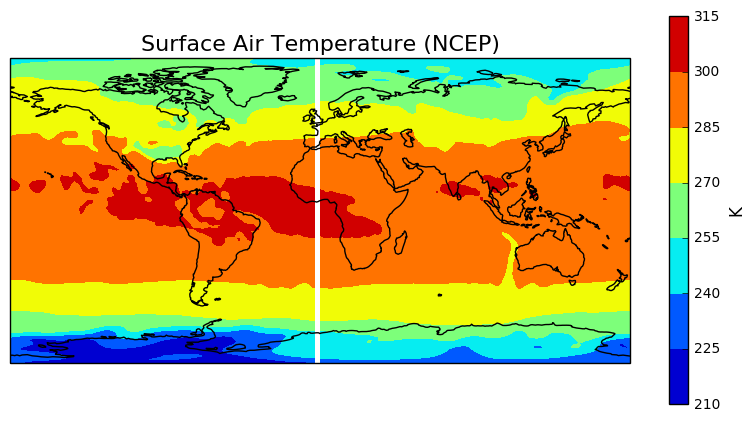

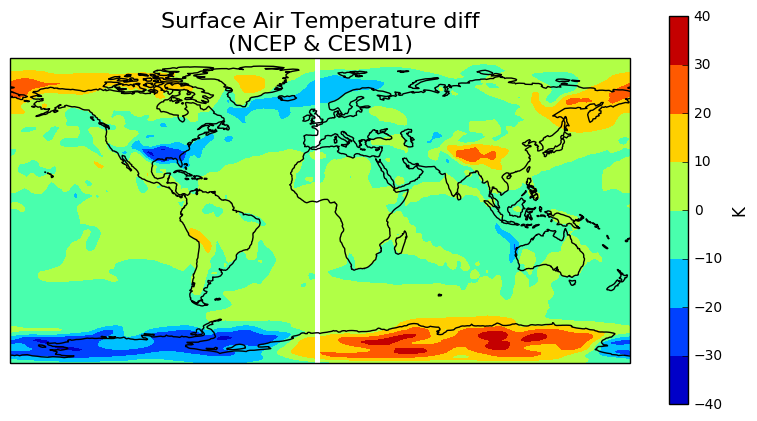

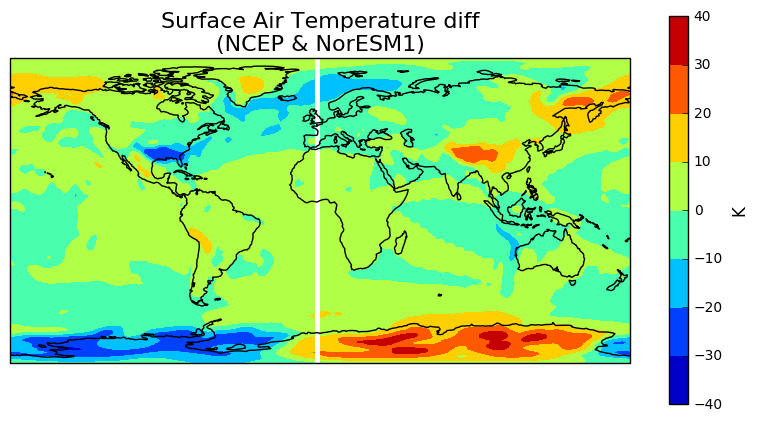

In [16]:
ncep_tas_regridded = interpn((ncep.T2.LAT, ncep.T2.LON), np.array(ncep.T2), (grid_x, grid_y), method='linear')
CESM1_tas_regridded = interpn((CESM1_tas.lat, CESM1_tas.lon), np.array(CESM1_tas_mean), (grid_x, grid_y), method='linear')
NorESM1_tas_regridded = interpn((NorESM1_tas.lat, NorESM1_tas.lon), np.array(NorESM1_tas_mean), (grid_x, grid_y), method='linear')

ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(grid_y, grid_x, ncep_tas_regridded, transform=ccrs.PlateCarree())
cb = plt.colorbar()
cb.ax.set_ylabel('K', fontsize=12)
plt.title('Surface Air Temperature (NCEP)', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
ax.coastlines()
plt.show()

ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(grid_y, grid_x, ncep_tas_regridded - CESM1_tas_regridded, transform=ccrs.PlateCarree())
cb = plt.colorbar()
cb.ax.set_ylabel('K', fontsize=12)
plt.title('Surface Air Temperature diff\n(NCEP & CESM1)', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
ax.coastlines()
plt.show()

ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(grid_y, grid_x, ncep_tas_regridded - NorESM1_tas_regridded, transform=ccrs.PlateCarree())
cb = plt.colorbar()
cb.ax.set_ylabel('K', fontsize=12)
plt.title('Surface Air Temperature diff\n(NCEP & NorESM1)', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
ax.coastlines()
plt.show()

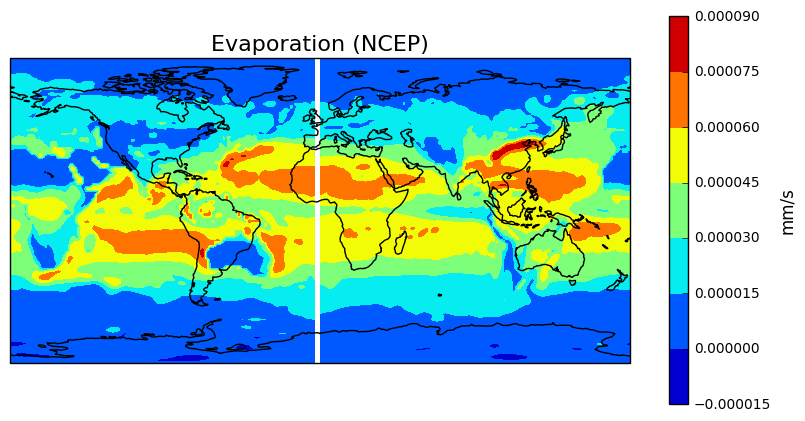

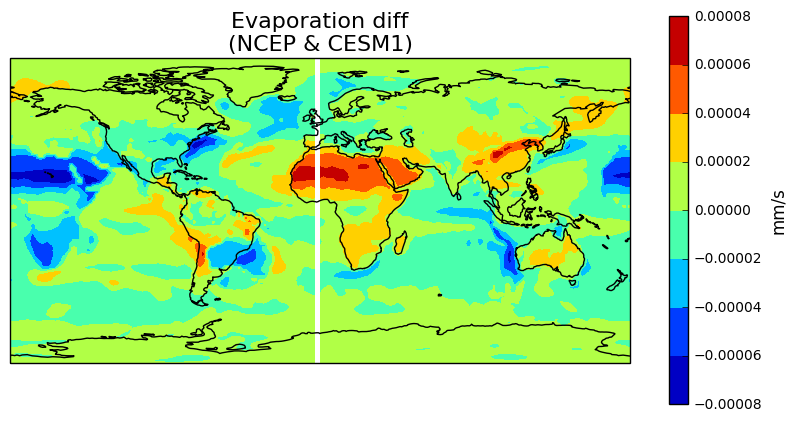

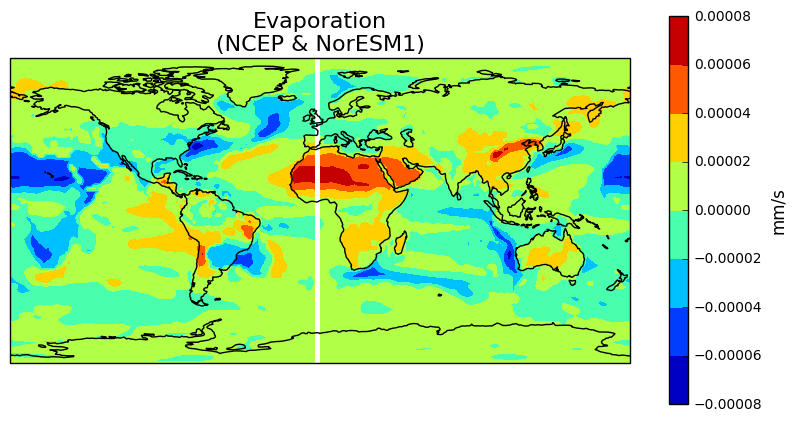

In [17]:
ncep_evap_regridded = interpn((ncep.evap.LAT, ncep.evap.LON), np.array(ncep.evap), (grid_x, grid_y), method='linear')
CESM1_evap_regridded = interpn((CESM1_evap.lat, CESM1_evap.lon), np.array(CESM1_evap_mean), (grid_x, grid_y), method='linear')
NorESM1_evap_regridded = interpn((NorESM1_evap.lat, NorESM1_evap.lon), np.array(NorESM1_evap_mean), (grid_x, grid_y), method='linear')

ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(grid_y, grid_x, ncep_evap_regridded, transform=ccrs.PlateCarree())
cb = plt.colorbar()
cb.ax.set_ylabel('mm/s', fontsize=12)
plt.title('Evaporation (NCEP)', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
ax.coastlines()
plt.show()

ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(grid_y, grid_x, ncep_evap_regridded - CESM1_evap_regridded, transform=ccrs.PlateCarree())
cb = plt.colorbar()
cb.ax.set_ylabel('mm/s', fontsize=12)
plt.title('Evaporation diff\n(NCEP & CESM1)', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
ax.coastlines()
plt.show()

ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(grid_y, grid_x, ncep_evap_regridded - NorESM1_evap_regridded, transform=ccrs.PlateCarree())
cb = plt.colorbar()
cb.ax.set_ylabel('mm/s', fontsize=12)
plt.title('Evaporation\n(NCEP & NorESM1)', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
ax.coastlines()
plt.show()

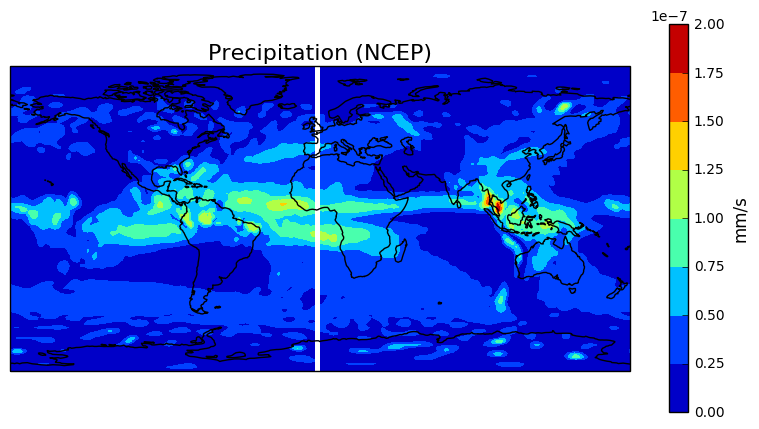

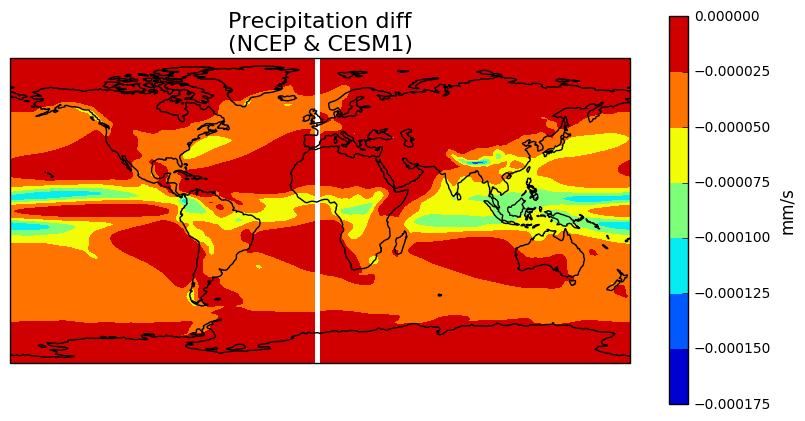

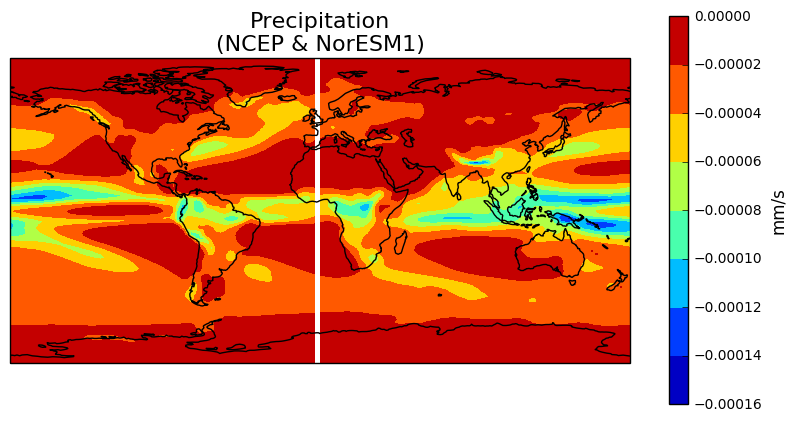

In [18]:
ncep_pr_regridded = interpn((ncep.PRECI.LAT, ncep.PRECI.LON), np.array(ncep.PRECI), (grid_x, grid_y), method='linear')
CESM1_pr_regridded = interpn((CESM1_pr.lat, CESM1_pr.lon), np.array(CESM1_pr_mean), (grid_x, grid_y), method='linear')
NorESM1_pr_regridded = interpn((NorESM1_pr.lat, NorESM1_pr.lon), np.array(NorESM1_pr_mean), (grid_x, grid_y), method='linear')


ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(grid_y, grid_x, ncep_pr_regridded, transform=ccrs.PlateCarree())
cb = plt.colorbar()
cb.ax.set_ylabel('mm/s', fontsize=12)
plt.title('Precipitation (NCEP)', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
ax.coastlines()
plt.show()

ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(grid_y, grid_x, ncep_pr_regridded - CESM1_pr_regridded, transform=ccrs.PlateCarree())
cb = plt.colorbar()
cb.ax.set_ylabel('mm/s', fontsize=12)
plt.title('Precipitation diff\n(NCEP & CESM1)', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
ax.coastlines()
plt.show()

ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(grid_y, grid_x, ncep_pr_regridded - NorESM1_pr_regridded, transform=ccrs.PlateCarree())
cb = plt.colorbar()
cb.ax.set_ylabel('mm/s', fontsize=12)
plt.title('Precipitation\n(NCEP & NorESM1)', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
ax.coastlines()
plt.show()

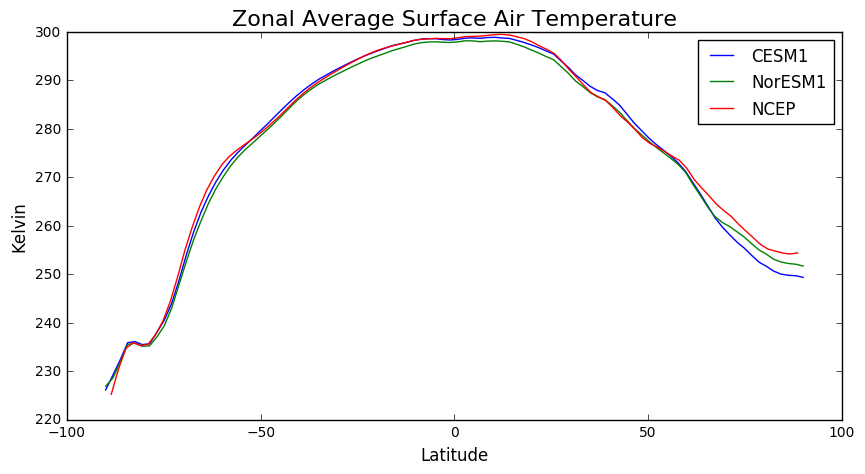

In [19]:
# Plot zonal average surface air temperature
temp_zonal_1 = CESM1_tas_mean.mean('lon')
temp_zonal_1.plot(label='CESM1')
temp_zonal_2 = NorESM1_tas_mean.mean('lon')
temp_zonal_2.plot(label='NorESM1')
temp_zonal_ncep = ncep.T2.mean('LON')
temp_zonal_ncep.plot(label='NCEP')

plt.title('Zonal Average Surface Air Temperature', fontsize=16)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Kelvin', fontsize=12)
plt.legend()
plt.show()

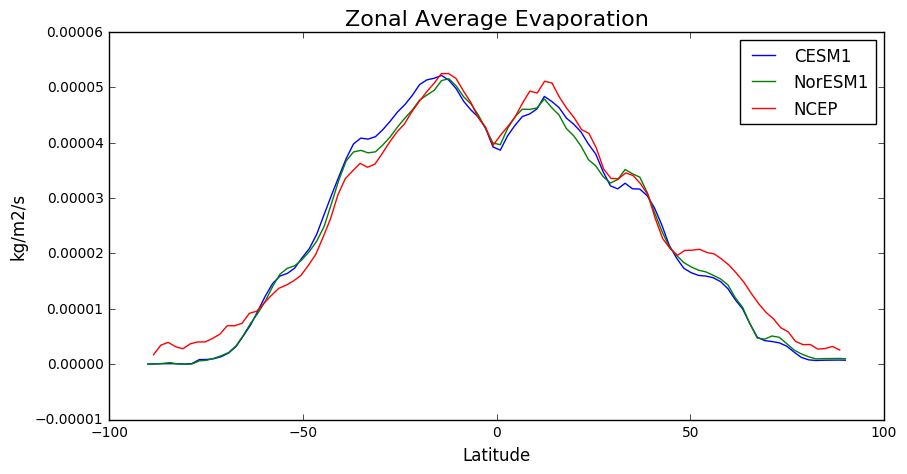

In [20]:
# Plot zonal average evap
evap_zonal_1 = CESM1_evap_mean.mean('lon')
evap_zonal_1.plot(label='CESM1')
evap_zonal_2 = NorESM1_evap_mean.mean('lon')
evap_zonal_2.plot(label='NorESM1')

evap_zonal_ncep = ncep.evap.mean('LON')
evap_zonal_ncep.plot(label='NCEP')

plt.title('Zonal Average Evaporation', fontsize=16)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('kg/m2/s', fontsize=12)
plt.legend()
plt.show()

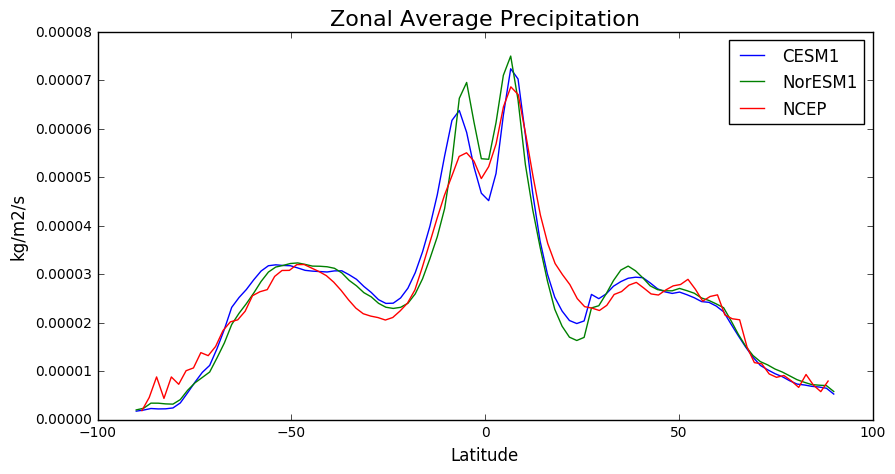

In [21]:
# Plot zonal average precip
precip_zonal_1= CESM1_pr_mean.mean('lon')
precip_zonal_1.plot(label='CESM1')
precip_zonal_2 = NorESM1_pr_mean.mean('lon')
precip_zonal_2.plot(label='NorESM1')
precip_zonal_ncep = ncep.PRECI.mean('LON') * 1000
precip_zonal_ncep.plot(label='NCEP')

plt.title('Zonal Average Precipitation', fontsize=16)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('kg/m2/s', fontsize=12)
plt.legend()
plt.show()

In [22]:
ncep_bands_surface_areas = 2 * np.pi * (EARTH_RADIUS ** 2) * np.diff(np.sin(np.radians(ncep.LAT)))

In [23]:
ncep_global_avg_tas = np.average((temp_zonal_ncep.values[:-1] + temp_zonal_ncep[1:]) / 2, weights=ncep_bands_surface_areas)

print('NCEP Global Average Surface Air Temperature: {:0.2f} K\n'.format(NorESM1_global_avg_tas))
print('Global Average Surface Air Temperature Difference (NCEP and CESM1): {:0.2f} K\n'.format(ncep_global_avg_tas - CESM1_global_avg_tas))
print('Global Average Surface Air Temperature Difference (NCEP and NorESM1): {:0.2f} K\n'.format(ncep_global_avg_tas - NorESM1_global_avg_tas))

NCEP Global Average Surface Air Temperature: 285.92 K

Global Average Surface Air Temperature Difference (NCEP and CESM1): 0.20 K

Global Average Surface Air Temperature Difference (NCEP and NorESM1): 1.03 K



In [24]:
ncep_global_avg_evap = np.average((evap_zonal_ncep.values[:-1] + evap_zonal_ncep[1:]) / 2, weights=ncep_bands_surface_areas)

print('NCEP Global Average Evaporation: {} mm/s\n'.format(ncep_global_avg_evap))
print('Global Average Global Average Evaporation Difference (NCEP and CESM1): {} mm/s\n'.format(ncep_global_avg_evap - CESM1_global_avg_evap))
print('Global Average Global Average Difference (NCEP and NorESM1): {} mm/s\n'.format(ncep_global_avg_evap - NorESM1_global_avg_evap))

NCEP Global Average Evaporation: 3.3191549972351346e-05 mm/s

Global Average Global Average Evaporation Difference (NCEP and CESM1): 4.822948865954818e-07 mm/s

Global Average Global Average Difference (NCEP and NorESM1): 8.930849409932647e-07 mm/s



In [25]:
ncep_global_avg_precip = np.average((precip_zonal_ncep.values[:-1] + precip_zonal_ncep[1:]) / 2, weights=ncep_bands_surface_areas)

print('NCEP Global Average Evaporation: {} mm/s\n'.format(ncep_global_avg_precip))
print('Global Average Global Average Evaporation Difference (NCEP and CESM1): {} mm/s\n'.format(ncep_global_avg_precip - CESM1_global_avg_pr))
print('Global Average Global Average Difference (NCEP and NorESM1): {} mm/s\n'.format(ncep_global_avg_precip - NorESM1_global_avg_pr))

NCEP Global Average Evaporation: 3.205228336311561e-05 mm/s

Global Average Global Average Evaporation Difference (NCEP and CESM1): -6.56928241097412e-07 mm/s

Global Average Global Average Difference (NCEP and NorESM1): -2.465147263810288e-07 mm/s



### b. Discuss your results.

Does one model obviously perform better than the other?  Does one model perform better in some regions, and worse in others (if so, which regions)? You don’t need to explain why this happens (if you could, you could get a job right now at a modeling center!), but try to relate what you observe to general climate phenomenon (e.g., Hadley circulation extending further poleward, decreased evaporation over subtropical land, etc.) you think may be involved. Wild speculation is fine, as long as it isn’t contradicted by the data. 

## Overview:
    
    Generally looks like CESM1 is closeer to NCEP observations than NorESM1. Especially when we look at evaporation and precipitation over oceans, the former is doing better. As for surface temperature, while CESM1 performs better globably, there is a latitude range from the south pole to ~60N that NorESM gives better results.

## Surface Air Temperature:

    Global average of observed temperature from NCEP is more than both models. NCEP is 0.2K and 1.03K higher than CESM1 and NorESM1 respectively. At the south pole, both models have higher temperature compared to NCEP (~2K). At 45N CESM1 goes above NCEP by about 2K, and as we continue moving north, both CESM1 and NorESM1 stay below NCEP.
    
    Both models show lower temperature for Antarctica in the eastern hemisphere and higher temperature for it in the western hemisphere.
    
    As for the oceans, north of the Atlantic Ocean, the Indian Ocean, and most of the Pacific Ocean (except for west of South America up to about 130W longitude and east of Asia) are warmer in the models. 

## Evaporation:

    Differences of NCEP evaporation rate with CESM1 and NorESM1 have similar distribution pattern. Both models have almost lower rate of evaporation in the oceans and higher rate over land areas. The biggest differences are seen in North Africa and middle of the Pacific Ocean. NCEP shows higher evaporation in north Africa and a lower rate in the Pacific Ocean compared to the models. In general evaporation over lands in models are lower than observation.
    
    As for zonal average, both models have more evaporation between ~60S and 20S  and at other latitudes they are below NCEP.
    
    On global average, NCEP evaporation is 4.8e-07 and 8.9e-07 mm/s higher than CESM1 and NorESM1 respectively.

## Precipitation:

    Both CESM1 and NorESM1 have higher precipitation rate compared to NCEP except for the ocean areas around the equator and also central Africa.
    
    Zonal average plot shows observed precipitation between ~40S and 10N degree latitude is lower than what the models suggest .The same pattern can be seen at both 45S and 45N. At other latitudes, NCEP has higher precipitation rate.
    
    On global average, CESM1 precipitation is ~6.57 mm/s less than NCEP while NorESM1 is 2.46 mm/s less.

## Checklist

* Notebook re-runs correctly ("Kernel" -> "Restart and run all" works).
* All variables are commented with short variable decription (if not obvious from variable name) and units.
* Any functions include docstrings or sufficient commenting to describe inputs, outputs, and what it does.
* Include sufficient commenting in code that someone could look at portions and easily understand your methodology.
* Plots include titles, labels (with units) on x and y axes, and legends (if multiple lines). (Titles/legends are not necessary if they convey no more information than x and y axis labels.)
* Numerical values in Markdown or print statements include units.
* Answers to “compare,” “explain,” etc. questions are in complete sentences and grammatically correct. 